# Thompson Sampling

## Importing the dataset

In [1]:
dataset = read.csv('Ads_CTR_Optimisation.csv')
head(dataset)

Ad.1,Ad.2,Ad.3,Ad.4,Ad.5,Ad.6,Ad.7,Ad.8,Ad.9,Ad.10
1,0,0,0,1,0,0,0,1,0
0,0,0,0,0,0,0,0,1,0
0,0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,1,0,0
0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0


## Implementing Thompson Sampling

In [2]:
N = 10000
d = 10
ads_selected = integer(0)
numbers_of_rewards_1 = integer(d)
numbers_of_rewards_0 = integer(d)
total_reward = 0
for (n in 1:N) {
    ad = 0
    max_random = 0
    for (i in 1:d) {
    random_beta = rbeta(n = 1,
                        shape1 = numbers_of_rewards_1[i] + 1,
                        shape2 = numbers_of_rewards_0[i] + 1)
    if (random_beta > max_random) {
        max_random = random_beta
        ad = i
    }
    }
    ads_selected = append(ads_selected, ad)
    reward = dataset[n, ad]
    if (reward == 1) {
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    } else {
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    }
    total_reward = total_reward + reward
}

## Visualising the results

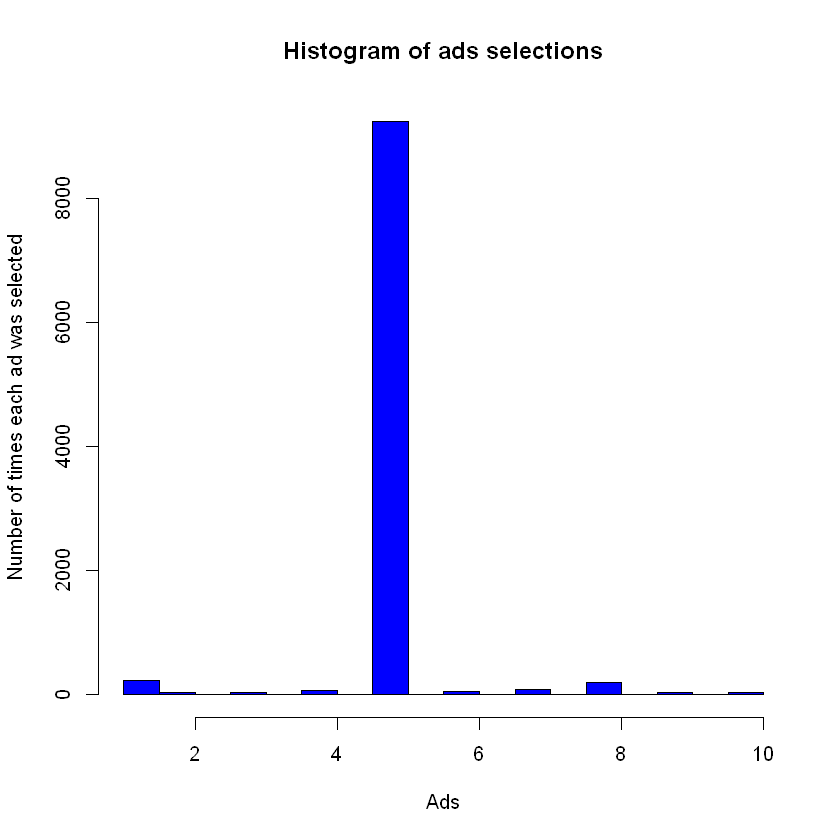

In [3]:
hist(ads_selected,
     col='blue',
     main='Histogram of ads selections',
     xlab='Ads',
     ylab='Number of times each ad was selected')